# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [425]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [427]:
# Checking the number of mice.
combined_df["Mouse ID"].unique().size

249

In [429]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [431]:
# 4. Optional: Get all the data for the duplicate mouse ID.

duplicate_mice_df = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [433]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = 'first', ignore_index = True)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [435]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].unique().size

249

## Summary Statistics

In [438]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
# for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
Tumor_mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Tumor_median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Tumor_var= clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Tumor_std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Tumor_sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

regimen_summary = pd.DataFrame({"Mean Tumor Volume": Tumor_mean, 
                               "Median Tumor Volume": Tumor_median, 
                               "Tumor Volume Variance": Tumor_var, 
                               "Tumor Volume Std. Dev.": Tumor_std,
                               "Tumor Volume Std. Err.": Tumor_sem
                               })
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [440]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [443]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_row = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 
total_row

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

TypeError: 'str' object is not callable

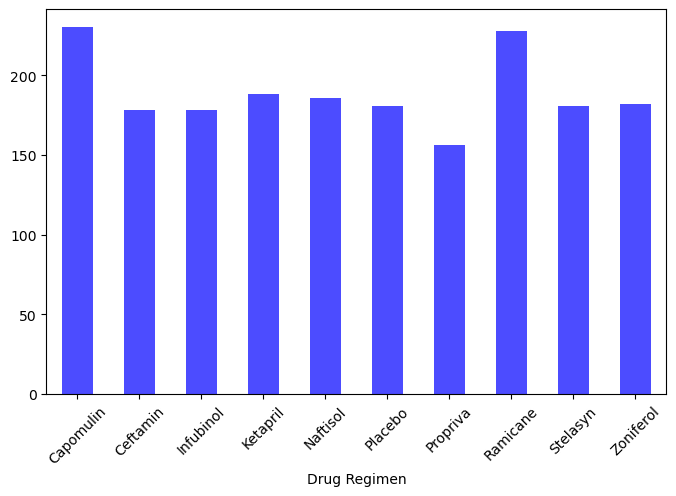

In [449]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

total_row.plot(kind = 'bar', color = 'blue', rot = 45, alpha = 0.7, figsize = (8, 5))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

TypeError: 'str' object is not callable

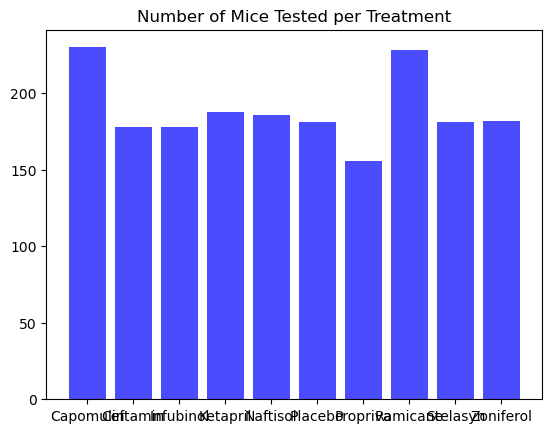

In [457]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = total_row.index.values
y_axis = total_row.values

plt.bar(x_axis, y_axis, color = 'blue', alpha = 0.7)

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("'# of Observed Mouse Timepoints'")
plt.xticks(rotation=45)
plt.figure(figsize = (8, 5))

plt.show()



In [453]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [455]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_data = clean_df['Sex'].value_counts()
gender_data

Sex
Male      958
Female    930
Name: count, dtype: int64

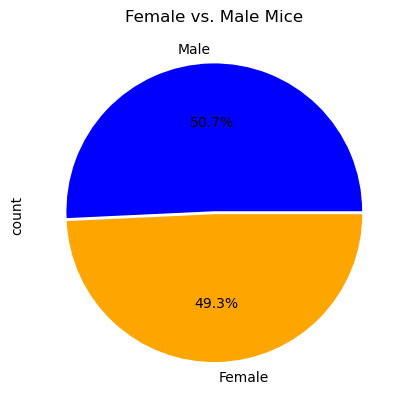

In [218]:
# Make the pie chart
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%", explode = [0.02, 0], colors = ['blue', 'orange'])
plt.show()

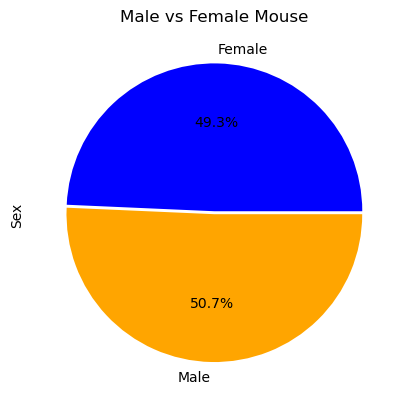

In [224]:
# Make the pie chart

labels = ['Female', 'Male']
sizes = [49.3, 50.7]
colors = ['blue', 'orange']
explode = [0.02, 0]
plt.pie(sizes, labels = labels, explode = explode, colors = colors, autopct="%1.1f%%")
plt.title('Male vs Female Mouse')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [230]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_df.loc[clean_df['Drug Regimen']== 'Capomulin']
Ramicane_df = clean_df.loc[clean_df['Drug Regimen']== 'Ramicane']
Infubinol_df = clean_df.loc[clean_df['Drug Regimen']== 'Infubinol']
Ceftamin_df = clean_df.loc[clean_df['Drug Regimen']== 'Ceftamin']


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [257]:
# Put treatments into a list for for loop (and later for plot labels)
Regimen_list = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

empty_list = []

# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID')['Timepoint'].max()
Capomulin_vol = pd.DataFrame(Capomulin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [423]:
Capomulin_tumors = Capomulin_merge['Tumor Volume (mm3)']

 # add subset
 # Determine outliers using upper and lower bounds

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

message = f"The values lower than {lower_bound} are outliers and the values higher than {upper_bound}  are outliers."
message

'The values lower than 20.70456164999999 are outliers and the values higher than 51.83201549  are outliers.'

In [417]:
# Ramicane

Ramicane_last = Ramicane_df.groupby('Mouse ID')['Timepoint'].max()
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")


Ramicane_tumors = Ramicane_merge['Tumor Volume (mm3)']

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

message = f"The values lower than {lower_bound} are outliers and the values higher than {upper_bound}  are outliers."
message

'The values lower than 17.912664470000003 are outliers and the values higher than 54.30681135  are outliers.'

In [419]:
# Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID')['Timepoint'].max()
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")


Infubinol_tumors = Infubinol_merge['Tumor Volume (mm3)']
quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

message = f"The values lower than {lower_bound} are outliers and the values higher than {upper_bound}  are outliers."
message

'The values lower than 36.83290494999999 are outliers and the values higher than 82.74144559000001  are outliers.'

In [421]:
# Ceftamin_df

Ceftamin_last = Ceftamin_df.groupby('Mouse ID')['Timepoint'].max()
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


Ceftamin_tumors = Ceftamin_merge['Tumor Volume (mm3)']
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

message = f"The values lower than {lower_bound} are outliers and the values higher than {upper_bound}  are outliers."
message

'The values lower than 25.355449580000002 are outliers and the values higher than 87.66645829999999  are outliers.'

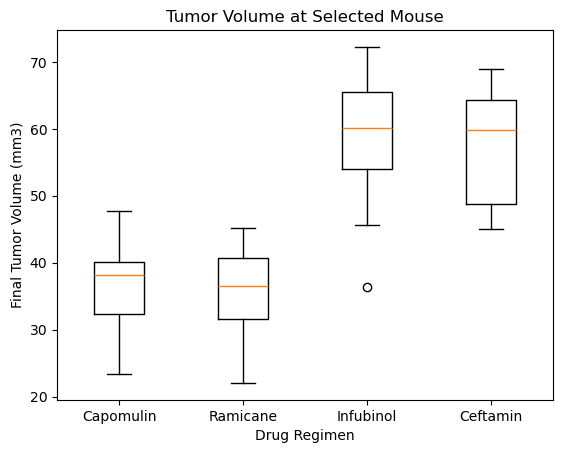

In [377]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


data = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

fig1, ax1 = plt.subplots()
ax1.boxplot(data, labels=Regimen_list, widths = 0.4, vert=True)
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

plt.show()


## Line and Scatter Plots

In [380]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

line_plot_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_plot_df .head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


TypeError: 'str' object is not callable

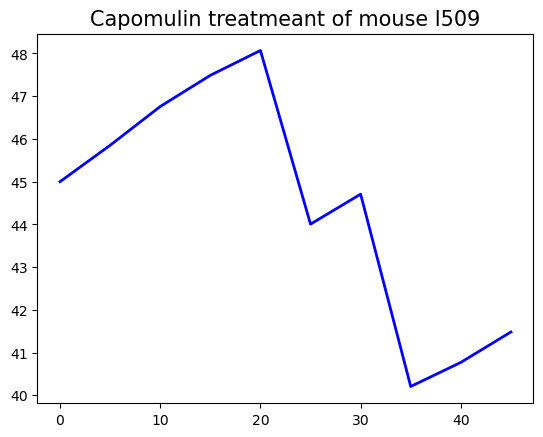

In [459]:
# Generate line plot
x_axis = line_plot_df["Timepoint"]
tumor_size = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumor_size,linewidth=2, markersize=10,marker="",color="blue")
plt.title('Capomulin treatmeant of mouse l509', fontsize = 15)
plt.xlabel('Timepoint (Days)', fontsize = 14)
plt.ylabel('Tumor Volume (mm3)', fontsize = 14)

plt.show

In [461]:
Capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1447,r157,Capomulin,Male,22,25,0,45.000000,0
1448,r157,Capomulin,Male,22,25,5,45.597064,0
1449,r157,Capomulin,Male,22,25,10,46.059608,0


In [463]:
# Calculate average values in Capomulin_df: 

Mean_Capomulin_df = Capomulin_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
Mean_Capomulin_df.head()

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22.0,41.963636
b742,21.0,40.083699
f966,17.0,36.505973
g288,19.0,41.990097
g316,22.0,44.613344


TypeError: 'str' object is not callable

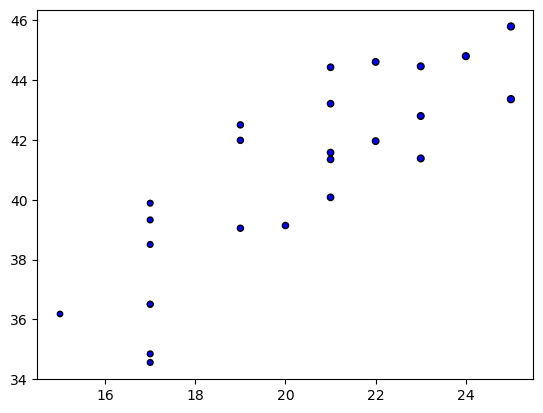

In [465]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


y_axis = Mean_Capomulin_df['Tumor Volume (mm3)']
x_axis = Mean_Capomulin_df['Weight (g)']

plt.scatter(x_axis, y_axis, marker = "o", facecolor = "blue", edgecolor = "black", s = x_axis)

plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()

## Correlation and Regression

TypeError: 'str' object is not callable

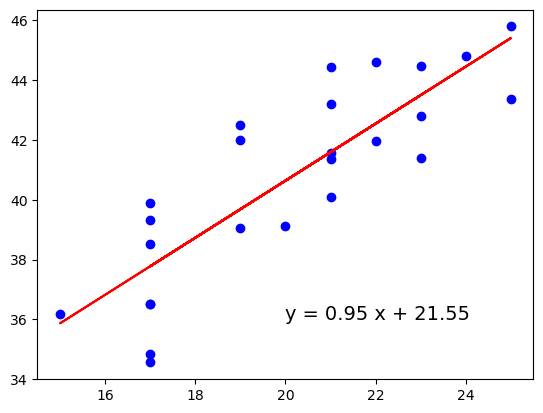

In [478]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(Mean_Capomulin_df["Weight (g)"],
                                                      Mean_Capomulin_df["Tumor Volume (mm3)"])
regress_values=Mean_Capomulin_df["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Mean_Capomulin_df["Weight (g)"],Mean_Capomulin_df["Tumor Volume (mm3)"],color='b')
plt.plot(Mean_Capomulin_df["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"The r-squared is: {round(rvalue**2,3)}")

plt.show()